Consider a trading universe consisting of one risky asset (a stock) and one riskless asset (a bond). We will consider the following general form of the SDE of the undiscounted price of the risky asset $S^1$: $$dS^1_t = \mu S^1_t dt + \sigma(S^1_t,t) dW_t $$
These are the specific models we will adress:
- Black-Scholes model: $\sigma(S_t,t) = \sigma S_t$
- CEV model: $\sigma(S_t,t) = \sigma S_t^\gamma$
- Heston model: $\sigma(S_t,t) = \sqrt{v_t}S_t$ where $dv_t = \kappa (\theta - v_t) dt + \xi \sqrt{v_t} dB_t$ where $B_t$ is a Brownian motion with correlatioin $\rho$ to $W_t$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ScenarioGenerator:
    def __init__(self, model, N=1000, T=1, M=1):
        models = {'BS', 'CEV', 'HESTON'}
        if model['name'] not in models:
            raise ValueError(f"Invalid model type: {model['name']}")

        self.model = model['name']
        self.params = model['params']
        self.N = N
        self.T = T
        self.M = M

    def generate_BS_scenarios(self):
        mu = self.params['mu']
        sigma = self.params['sigma']
        S0 = self.params['S0']
        S = np.zeros((self.M, self.N))
        S[:, 0] = S0
        dt = self.T / self.N

        for i in range(1, self.N):
            dW = np.random.randn(self.M) * np.sqrt(dt)
            S[:, i] = S[:, i-1] + mu * S[:, i-1] * dt + sigma * S[:, i-1] * dW
        return S

    def generate_CEV_scenarios(self):
        mu = self.params['mu']
        sigma = self.params['sigma']
        gamma = self.params['gamma']
        S0 = self.params['S0']
        S = np.zeros((self.M, self.N))
        S[:, 0] = S0
        dt = self.T / self.N

        for i in range(1, self.N):
            dW = np.random.randn(self.M) * np.sqrt(dt)
            S[:, i] = S[:, i-1] + mu * S[:, i-1] * dt + sigma * (S[:, i-1] ** gamma) * dW
        return S

    def generate_Heston_scenarios(self):
        mu = self.params['mu']
        k = self.params['kappa']
        theta = self.params['theta']
        xi = self.params['xi']
        rho = self.params['rho']
        v0 = self.params['v0']
        S0 = self.params['S0']
        dt = self.T / self.N
        v = np.zeros((self.M, self.N))
        v[:, 0] = v0
        S = np.zeros((self.M, self.N))
        S[:, 0] = S0

        for i in range(1, self.N):
            dW = np.random.randn(self.M) * np.sqrt(dt)
            dW2 = np.random.randn(self.M) * np.sqrt(dt)
            dB = rho * dW + np.sqrt(1 - rho**2) * dW2

            S[:, i] = S[:, i-1] + mu * S[:, i-1] * dt + np.sqrt(v[:, i-1]) * S[:, i-1] * dW
            v[:, i] = v[:, i-1] + k * (theta - v[:, i-1]) * dt + xi * np.sqrt(v[:, i-1]) * dB
        return S

    def generate_scenarios(self):
        if self.model == 'BS':
            return self.generate_BS_scenarios()
        if self.model == 'CEV':
            return self.generate_CEV_scenarios()
        if self.model == 'HESTON':
            return self.generate_Heston_scenarios()

Before specifying agents, we first test our class:

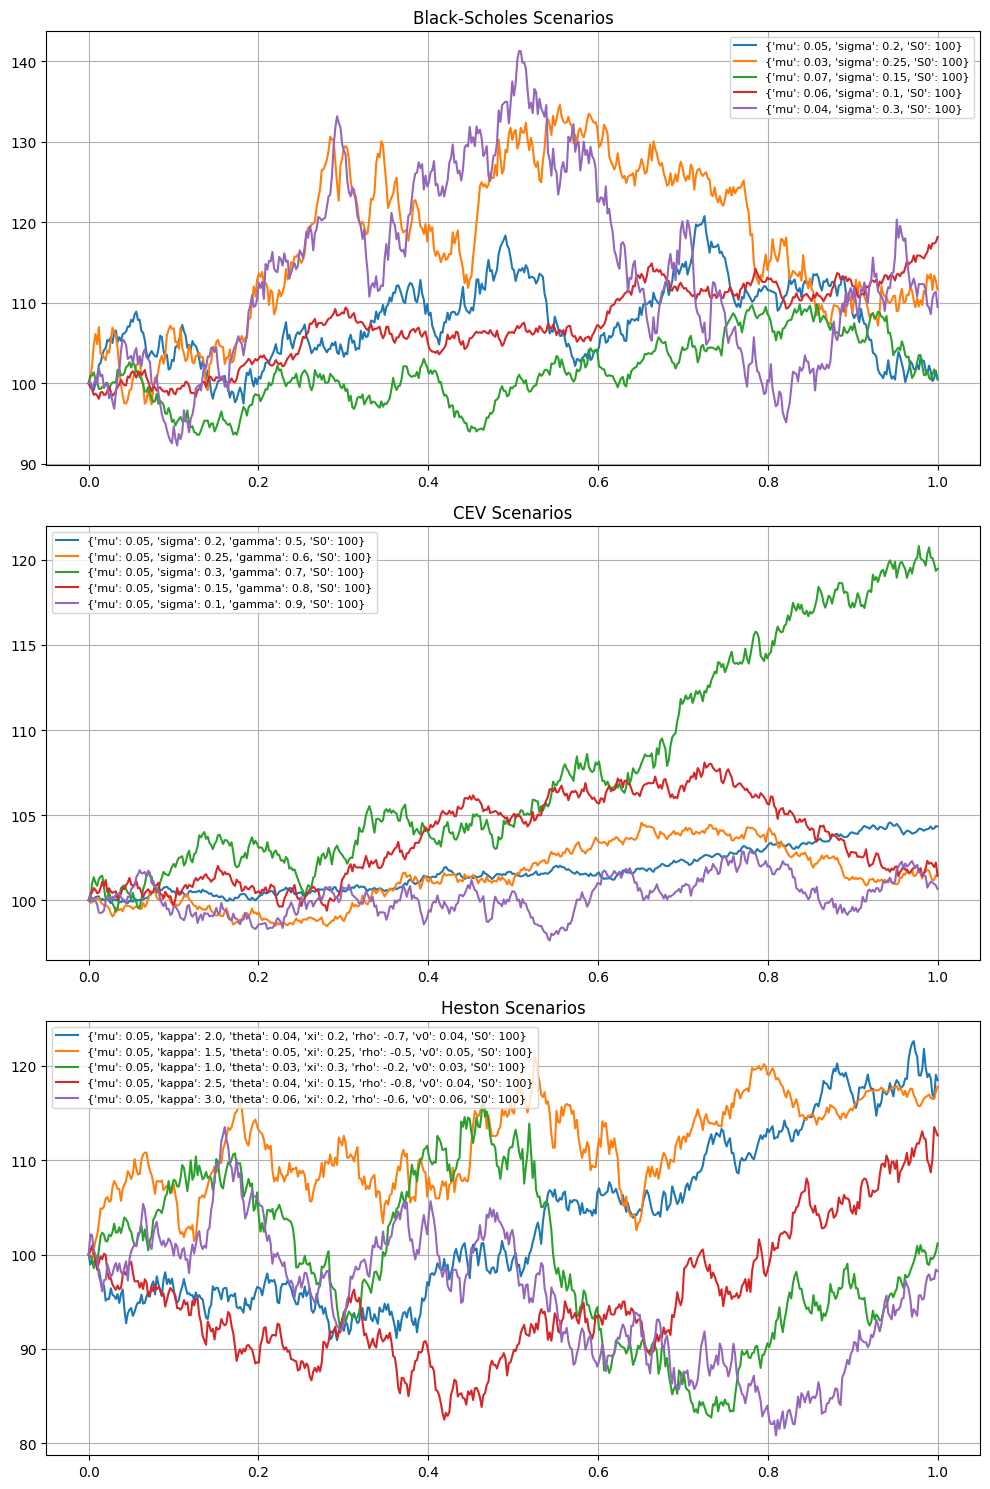

In [ ]:
N = 500
T = 1
M = 1
time = np.linspace(0, T, N)

bs_params_list = [
    {'name': 'BS', 'params': {'mu': 0.05, 'sigma': 0.2, 'S0': 100}},
    {'name': 'BS', 'params': {'mu': 0.03, 'sigma': 0.25, 'S0': 100}},
    {'name': 'BS', 'params': {'mu': 0.07, 'sigma': 0.15, 'S0': 100}},
    {'name': 'BS', 'params': {'mu': 0.06, 'sigma': 0.1,  'S0': 100}},
    {'name': 'BS', 'params': {'mu': 0.04, 'sigma': 0.3,  'S0': 100}},
]

cev_params_list = [
    {'name': 'CEV', 'params': {'mu': 0.05, 'sigma': 0.2, 'gamma': 0.5, 'S0': 100}},
    {'name': 'CEV', 'params': {'mu': 0.05, 'sigma': 0.25, 'gamma': 0.6, 'S0': 100}},
    {'name': 'CEV', 'params': {'mu': 0.05, 'sigma': 0.3, 'gamma': 0.7, 'S0': 100}},
    {'name': 'CEV', 'params': {'mu': 0.05, 'sigma': 0.15, 'gamma': 0.8, 'S0': 100}},
    {'name': 'CEV', 'params': {'mu': 0.05, 'sigma': 0.1, 'gamma': 0.9, 'S0': 100}},
]

heston_params_list = [
    {'name': 'HESTON', 'params': {'mu': 0.05, 'kappa': 2.0, 'theta': 0.04, 'xi': 0.2, 'rho': -0.7, 'v0': 0.04, 'S0': 100}},
    {'name': 'HESTON', 'params': {'mu': 0.05, 'kappa': 1.5, 'theta': 0.05, 'xi': 0.25, 'rho': -0.5, 'v0': 0.05, 'S0': 100}},
    {'name': 'HESTON', 'params': {'mu': 0.05, 'kappa': 1.0, 'theta': 0.03, 'xi': 0.3, 'rho': -0.2, 'v0': 0.03, 'S0': 100}},
    {'name': 'HESTON', 'params': {'mu': 0.05, 'kappa': 2.5, 'theta': 0.04, 'xi': 0.15, 'rho': -0.8, 'v0': 0.04, 'S0': 100}},
    {'name': 'HESTON', 'params': {'mu': 0.05, 'kappa': 3.0, 'theta': 0.06, 'xi': 0.2, 'rho': -0.6, 'v0': 0.06, 'S0': 100}},
]


fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for p in bs_params_list:
    gen = ScenarioGenerator(p, N=N, T=T, M=M)
    path = gen.generate_scenarios()[0]
    axs[0].plot(time, path, label=str(p['params']))
axs[0].set_title("Black-Scholes Scenarios")
axs[0].legend(fontsize=8)
axs[0].grid(True)


for p in cev_params_list:
    gen = ScenarioGenerator(p, N=N, T=T, M=M)
    path = gen.generate_scenarios()[0]
    axs[1].plot(time, path, label=str(p['params']))
axs[1].set_title("CEV Scenarios")
axs[1].legend(fontsize=8)
axs[1].grid(True)

for p in heston_params_list:
    gen = ScenarioGenerator(p, N=N, T=T, M=M)
    path = gen.generate_scenarios()[0]
    axs[2].plot(time, path, label=str(p['params']))
axs[2].set_title("Heston Scenarios")
axs[2].legend(fontsize=8)
axs[2].grid(True)

plt.tight_layout()
plt.show()

We first define a Markovian agent. We model the fraction of his wealth distributed to the risky asset at time $t$, $\pi_t$ as $$\pi_t = tanh(\theta_0 + \theta_1 w_t + \theta_2 S_t + \theta_3 t)$$ where $w_t$ is the current wealth. The parameters are optimized by maximized the expected log utility.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MarkovianAgent(nn.Module):
    def __init__(self, init_theta=None):
        super().__init__()
        if init_theta is not None:
            theta_tensor = torch.tensor(init_theta, dtype=torch.float32)
        else:
            theta_tensor = torch.randn(4, dtype=torch.float32)
        self.theta = nn.Parameter(theta_tensor)

    def strategy(self, t, w_t, S_t):
        S_t_scaled = (S_t - 100.0) / 100.0
        w_t_scaled = (w_t - 100.0) / 100.0
        return torch.tanh(self.theta[0] + self.theta[1] * w_t_scaled + self.theta[2] * S_t_scaled + self.theta[3] * t)


    def compute_loss(self, S_paths, T, lambda_entropy=1e-3):
        M, N = S_paths.shape
        dt = T / N

        wealth = torch.full((M,), 100.0, dtype=torch.float32)
        entropy_terms = []

        for t in range(N - 1):
            time = torch.full((M,), t * dt, dtype=torch.float32)
            S_t = S_paths[:, t]
            S_next = S_paths[:, t + 1]
            returns = S_next / S_t

            w_t_scaled = (wealth - 100.0) / 100.0
            S_t_scaled = (S_t - 100.0) / 100.0

            z = self.theta[0] + self.theta[1] * w_t_scaled + self.theta[2] * S_t_scaled + self.theta[3] * time
            pi_t = torch.tanh(z)

            entropy_terms.append((pi_t ** 2).mean())

            wealth = wealth * (pi_t * returns + (1 - pi_t))

        log_utility = torch.log(wealth + 1e-8)
        utility_loss = -torch.mean(log_utility)


        return utility_loss

    def update(self, S_paths, T, optimizer):
        self.train()
        optimizer.zero_grad()
        loss = self.compute_loss(S_paths, T)
        loss.backward()


        optimizer.step()
        return loss.item()

In [ ]:
from tqdm import tqdm

def train_MA(model_config):
    device = torch.device("cpu")
    scenario_gen = ScenarioGenerator(model_config, N=100, T=1, M=256)

    agent = MarkovianAgent().to(device)
    optimizer = torch.optim.Adam(agent.parameters(), lr=0.01)

    num_epochs = 100
    losses = []

    progress_bar = tqdm(range(num_epochs))

    for epoch in progress_bar:
        S_paths = scenario_gen.generate_scenarios()
        S_tensor = torch.tensor(S_paths, dtype=torch.float32, device=device)

        optimizer.zero_grad()
        loss = agent.compute_loss(S_tensor, T=1.0)
        loss.backward()

        grad_norm = agent.theta.grad.norm().item() if agent.theta.grad is not None else 0.0
        theta_values = agent.theta.detach().numpy()

        optimizer.step()
        losses.append(loss.item())

        progress_bar.set_postfix({
            "loss": f"{loss.item():.4f}",
            "grad_norm": f"{grad_norm:.4f}",
            "theta": ", ".join(f"{v:.2f}" for v in theta_values)
        })
    return agent




In [ ]:
def evaluate_MA(model_config):
    T = 1.0
    M = 10000
    N = 100


    eval_scenario_gen = ScenarioGenerator(model_config, N=N, T=T, M=M)
    S_paths = eval_scenario_gen.generate_scenarios()
    S_tensor = torch.tensor(S_paths, dtype=torch.float32)
    agent = train_MA(model_config)
    agent.eval()
    dt = T / N
    wealth = torch.full((M,), 100.0, dtype=torch.float32)
    wealth_paths = torch.zeros((M, N), dtype=torch.float32)
    wealth_paths[:, 0] = wealth

    for t in range(N - 1):
        time = torch.full((M,), t * dt, dtype=torch.float32)
        S_t = S_tensor[:, t]
        S_next = S_tensor[:, t + 1]
        returns = S_next / S_t

        with torch.no_grad():
            pi_t = agent.strategy(time, wealth, S_t)
            print

        wealth = wealth * (pi_t * returns + (1 - pi_t))
        wealth_paths[:, t + 1] = wealth

    wealth_paths_np = wealth_paths.numpy()

    market_wealth_paths = 100.0 * (S_tensor / S_tensor[:, [0]])
    market_wealth_paths_np = market_wealth_paths.numpy()

    time_grid = np.linspace(0, T, N)

    plt.figure(figsize=(10, 6))

    mean_wealth = wealth_paths_np.mean(axis=0)
    mean_market_wealth = market_wealth_paths_np.mean(axis=0)

    plt.plot(time_grid, mean_wealth, label='Agent Mean Wealth', linewidth=2)
    plt.plot(time_grid, mean_market_wealth, label='Market Strategy', linewidth=2, linestyle=':')

    for i in range(M):
        if i % 1000 == 0:
            plt.plot(time_grid, wealth_paths_np[i], linestyle='--', alpha=0.4)

    plt.title("Wealth Evolution: Agent vs. Market Strategy")
    plt.xlabel("Time")
    plt.ylabel("Wealth")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Agent - Mean Final Wealth: {mean_wealth[-1]:.4f}")
    print(f"Agent - Final Wealth Std Dev: {np.std(wealth_paths_np[:, -1]):.4f}")

    print(f"Market - Mean Final Wealth: {mean_market_wealth[-1]:.4f}")
    print(f"Market - Final Wealth Std Dev: {np.std(market_wealth_paths_np[:, -1]):.4f}")

Testing our agent on BS:

100%|██████████| 100/100 [00:05<00:00, 18.28it/s, loss=-4.6473, grad_norm=0.0133, theta=1.32, 1.34, -0.61, -0.41]


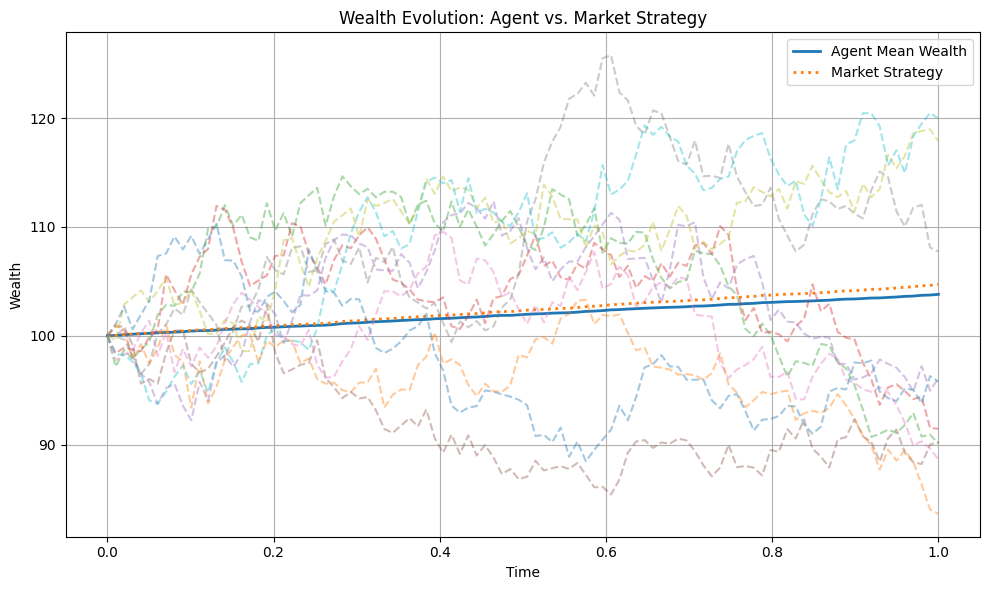

Agent - Mean Final Wealth: 103.8008
Agent - Final Wealth Std Dev: 16.8829
Market - Mean Final Wealth: 104.7117
Market - Final Wealth Std Dev: 20.8429


In [ ]:
model_config = {
        'name': 'BS',
        'params': {
            'mu': 0.05,
            'sigma': 0.2,
            'S0': 100
        }
    }
evaluate_MA(model_config)

100%|██████████| 100/100 [00:05<00:00, 17.61it/s, loss=-4.6476, grad_norm=0.0014, theta=-1.98, 0.75, -0.81, -1.47]


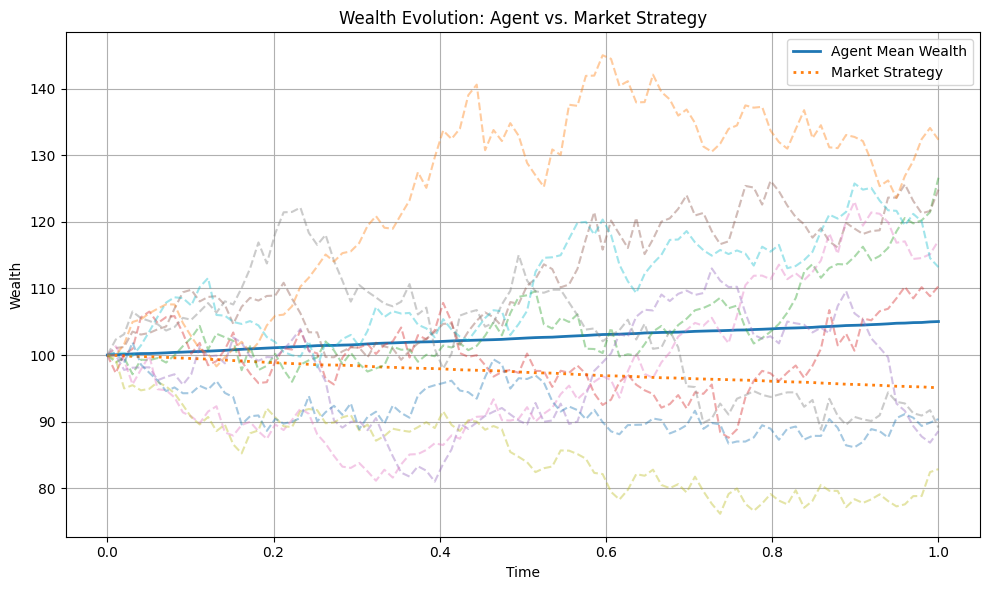

Agent - Mean Final Wealth: 105.0373
Agent - Final Wealth Std Dev: 20.7824
Market - Mean Final Wealth: 95.1178
Market - Final Wealth Std Dev: 18.9984


In [ ]:
model_config = {
        'name': 'BS',
        'params': {
            'mu': -0.05,
            'sigma': 0.2,
            'S0': 100
        }
    }
evaluate_MA(model_config)

Testing our Agent on CEV:

100%|██████████| 100/100 [00:05<00:00, 18.91it/s, loss=-4.6520, grad_norm=0.0086, theta=1.12, 0.90, 1.62, 0.94]


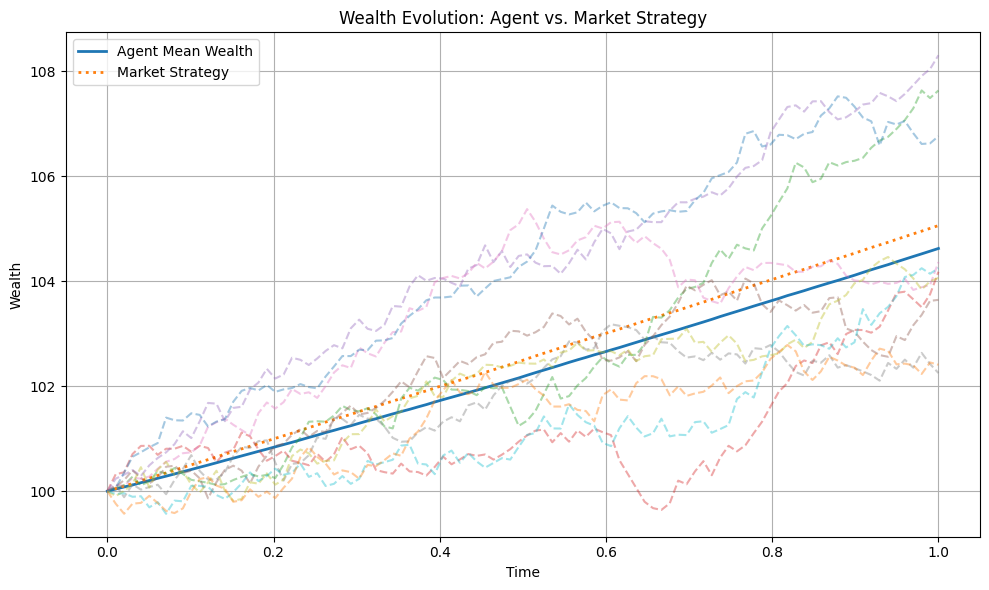

Agent - Mean Final Wealth: 104.6220
Agent - Final Wealth Std Dev: 1.8822
Market - Mean Final Wealth: 105.0578
Market - Final Wealth Std Dev: 2.0475


In [ ]:
model_config = {
    'name': 'CEV',
    'params': {
        'mu': 0.05,
        'sigma': 0.2,
        'gamma': 0.5,
        'S0': 100
    }
}
evaluate_MA(model_config)

Testing our Agent on Heston:

100%|██████████| 100/100 [00:06<00:00, 15.14it/s, loss=-4.6205, grad_norm=0.0251, theta=1.12, -0.46, 0.10, -0.98]


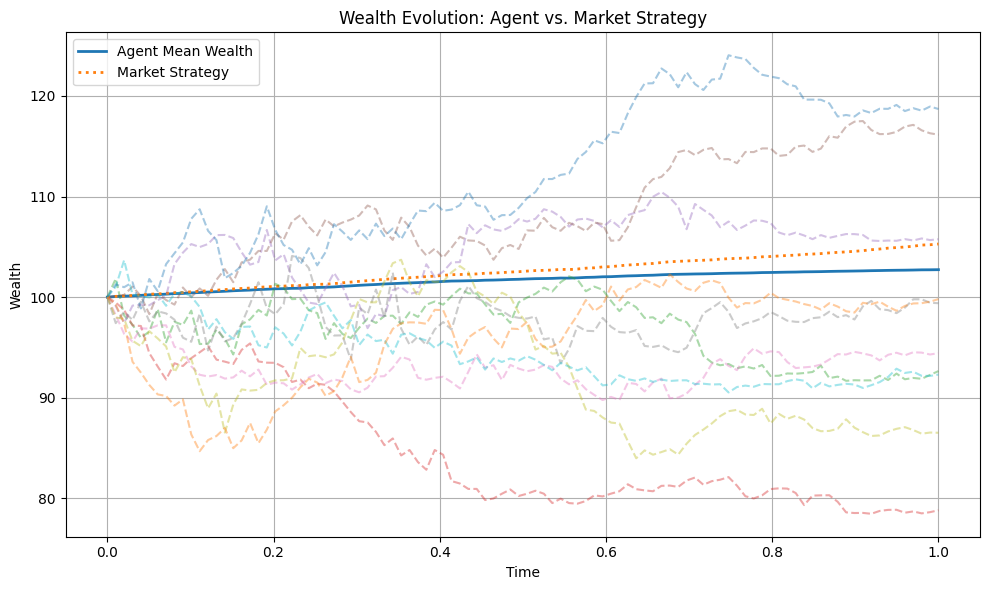

Agent - Mean Final Wealth: 102.7296
Agent - Final Wealth Std Dev: 11.4326
Market - Mean Final Wealth: 105.2805
Market - Final Wealth Std Dev: 21.4312


In [ ]:
model_config = {
    'name': 'HESTON',
    'params': {
        'mu': 0.05,
        'kappa': 2.0,
        'theta': 0.04,
        'xi': 0.2,
        'rho': 0.4,
        'v0': 0.04,
        'S0': 100
    }
}
evaluate_MA(model_config)

100%|██████████| 100/100 [00:05<00:00, 17.52it/s, loss=-4.6313, grad_norm=0.0132, theta=-0.58, 1.50, 1.40, -0.58]


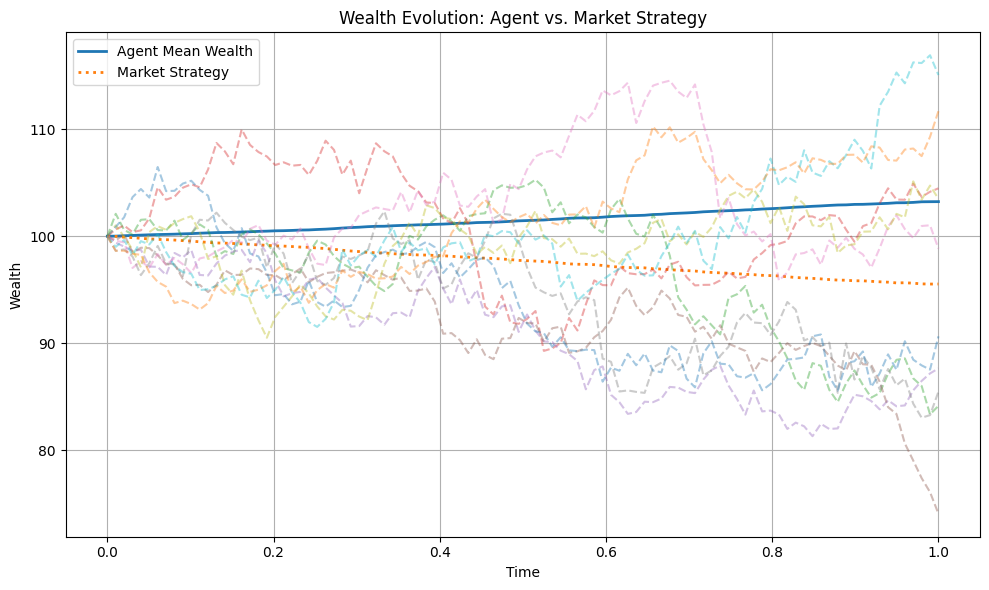

Agent - Mean Final Wealth: 103.2309
Agent - Final Wealth Std Dev: 14.3147
Market - Mean Final Wealth: 95.5359
Market - Final Wealth Std Dev: 19.8709


In [ ]:
model_config = {
    'name': 'HESTON',
    'params': {
        'mu': -0.05,
        'kappa': 2.0,
        'theta': 0.04,
        'xi': 0.2,
        'rho': 0.4,
        'v0': 0.04,
        'S0': 100
    }
}
evaluate_MA(model_config)

We now implement a path dependent Agent, to see if having access to the whole price time series affects the model performance under these asset price models.

In [ ]:
class PathDependentAgent(nn.Module):
    def __init__(self, hidden_size=32):
        super().__init__()

        self.lstm = nn.LSTM(input_size=2, hidden_size=hidden_size, batch_first=True)
        self.output_layer = nn.Sequential(
            nn.Linear(hidden_size, 1),
            nn.Tanh()
        )

    def strategy(self, S_history, w_history):
        """
        S_history, w_history: tensors of shape (batch, t+1)
        Returns: pi_t of shape (batch,)
        """
        x_seq = torch.stack([S_history, w_history], dim=2)  # shape: (batch, t+1, 2)
        _, (h_n, _) = self.lstm(x_seq)  # h_n: (1, batch, hidden)
        pi_t = self.output_layer(h_n.squeeze(0)).squeeze(-1)  # shape: (batch,)
        return pi_t

    def simulate_wealth(self, S_paths, T):
        M, N = S_paths.shape
        dt = T / N

        wealth = torch.full((M,), 100.0, dtype=torch.float32)
        pi_t_list = []

        S_hist = torch.zeros((M, 0), dtype=torch.float32)
        w_hist = torch.zeros((M, 0), dtype=torch.float32)

        for t in range(N - 1):
            S_t = S_paths[:, t]
            S_next = S_paths[:, t + 1]
            returns = S_next / S_t
            time = t * dt

            S_hist = torch.cat([S_hist, S_t.unsqueeze(1)], dim=1)
            w_hist = torch.cat([w_hist, wealth.unsqueeze(1)], dim=1)

            pi_t = self.strategy(S_hist, w_hist)
            pi_t_list.append(pi_t)

            wealth = wealth * (pi_t * returns + (1 - pi_t))

        return wealth, pi_t_list

    def compute_loss(self, S_paths, T, lambda_entropy=1e-3):
        w_T, pi_t_list = self.simulate_wealth(S_paths, T)
        utility_loss = -torch.mean(torch.log(w_T + 1e-8))
        entropy_penalty = lambda_entropy * torch.stack([p**2 for p in pi_t_list]).mean()
        return utility_loss + entropy_penalty

In [ ]:
def train_PDA(model_config):
    device = torch.device("cpu")

    scenario_gen = ScenarioGenerator(model_config, N=100, T=1, M=256)

    agent = PathDependentAgent().to(device)
    optimizer = torch.optim.Adam(agent.parameters(), lr=0.01)

    num_epochs = 10
    losses = []

    progress_bar = tqdm(range(num_epochs))

    for epoch in progress_bar:
        S_paths = scenario_gen.generate_scenarios()
        S_tensor = torch.tensor(S_paths, dtype=torch.float32, device=device)

        optimizer.zero_grad()
        loss = agent.compute_loss(S_tensor, T=1.0, lambda_entropy=1e-3)
        loss.backward()
        optimizer.step()

        grad_norm = 0.0
        for p in agent.parameters():
            if p.grad is not None:
                grad_norm += p.grad.norm().item() ** 2
        grad_norm = grad_norm ** 0.5

        losses.append(loss.item())

        progress_bar.set_postfix({
            "loss": f"{loss.item():.4f}",
            "grad_norm": f"{grad_norm:.4f}"
        })

    return agent

In [ ]:
def evaluate_PDA(model_config):
    T = 1.0
    M = 10000
    N = 100

    eval_scenario_gen = ScenarioGenerator(model_config, N=N, T=T, M=M)
    S_paths = eval_scenario_gen.generate_scenarios()
    S_tensor = torch.tensor(S_paths, dtype=torch.float32)

    agent = train_PDA(model_config)
    agent.eval()

    dt = T / N
    wealth = torch.full((M,), 100.0, dtype=torch.float32)
    wealth_paths = torch.zeros((M, N), dtype=torch.float32)
    wealth_paths[:, 0] = wealth

    S_hist = torch.zeros((M, 0), dtype=torch.float32)
    w_hist = torch.zeros((M, 0), dtype=torch.float32)

    for t in tqdm(range(N - 1)):
        time = torch.full((M,), t * dt, dtype=torch.float32)
        S_t = S_tensor[:, t]
        S_next = S_tensor[:, t + 1]
        returns = S_next / S_t

        S_hist = torch.cat([S_hist, S_t.unsqueeze(1)], dim=1)
        w_hist = torch.cat([w_hist, wealth.unsqueeze(1)], dim=1)

        with torch.no_grad():
            pi_t = agent.strategy(S_hist, w_hist)

        wealth = wealth * (pi_t * returns + (1 - pi_t))
        wealth_paths[:, t + 1] = wealth

    wealth_paths_np = wealth_paths.numpy()

    market_wealth_paths = 100.0 * (S_tensor / S_tensor[:, [0]])
    market_wealth_paths_np = market_wealth_paths.numpy()

    time_grid = np.linspace(0, T, N)

    plt.figure(figsize=(10, 6))
    mean_wealth = wealth_paths_np.mean(axis=0)
    mean_market_wealth = market_wealth_paths_np.mean(axis=0)

    plt.plot(time_grid, mean_wealth, label='Path-Dependent Agent', linewidth=2)
    plt.plot(time_grid, mean_market_wealth, label='Market Strategy', linewidth=2, linestyle=':')

    for i in range(M):
        if i % 1000 == 0:
            plt.plot(time_grid, wealth_paths_np[i], linestyle='--', alpha=0.4)

    plt.title("Wealth Evolution: Path-Dependent Agent vs. Market")
    plt.xlabel("Time")
    plt.ylabel("Wealth")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Agent - Mean Final Wealth: {mean_wealth[-1]:.4f}")
    print(f"Agent - Final Wealth Std Dev: {np.std(wealth_paths_np[:, -1]):.4f}")

    print(f"Market - Mean Final Wealth: {mean_market_wealth[-1]:.4f}")
    print(f"Market - Final Wealth Std Dev: {np.std(market_wealth_paths_np[:, -1]):.4f}")

100%|██████████| 99/99 [01:16<00:00,  1.29it/s]


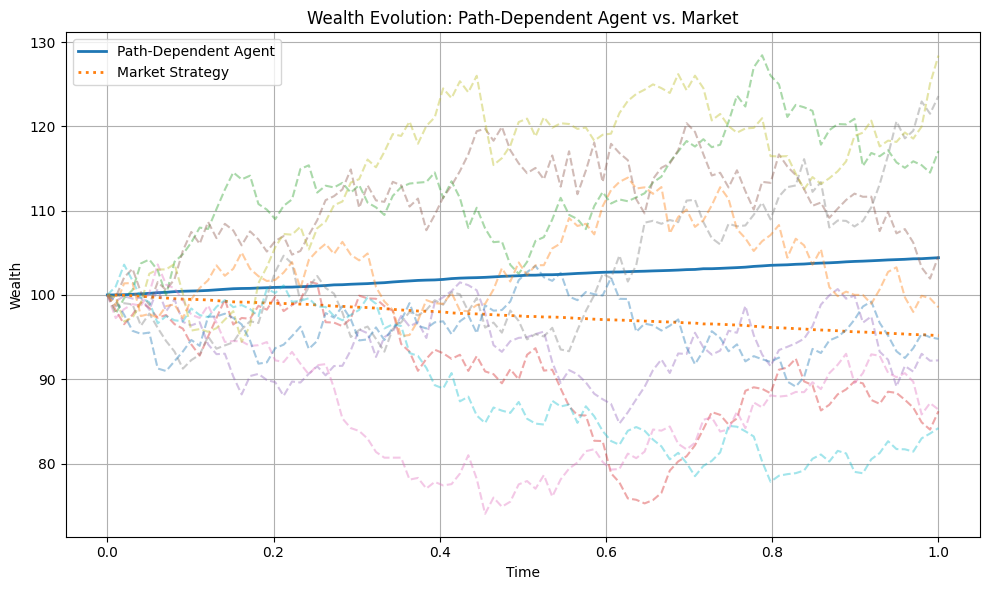

Agent - Mean Final Wealth: 104.4226
Agent - Final Wealth Std Dev: 18.3043
Market - Mean Final Wealth: 95.1855
Market - Final Wealth Std Dev: 19.1188


In [ ]:
model_config = {
        'name': 'BS',
        'params': {
            'mu': -0.05,
            'sigma': 0.2,
            'S0': 100
        }
    }
evaluate_PDA(model_config)

100%|██████████| 99/99 [01:13<00:00,  1.35it/s]


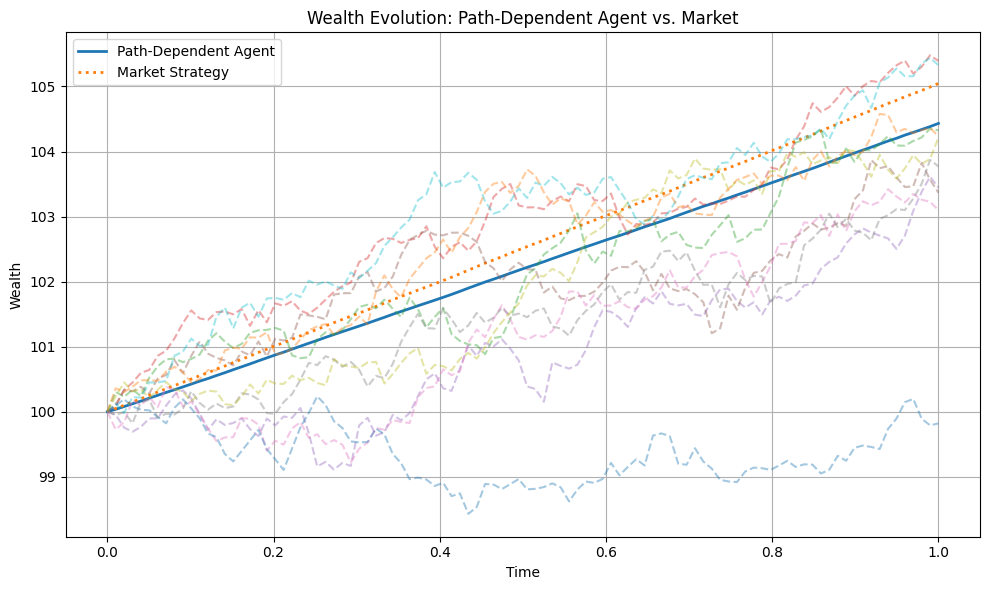

Agent - Mean Final Wealth: 104.4325
Agent - Final Wealth Std Dev: 1.8103
Market - Mean Final Wealth: 105.0463
Market - Final Wealth Std Dev: 2.0674


In [19]:
model_config = {
    'name': 'CEV',
    'params': {
        'mu': 0.05,
        'sigma': 0.2,
        'gamma': 0.5,
        'S0': 100
    }
}
evaluate_PDA(model_config)

100%|██████████| 99/99 [01:13<00:00,  1.35it/s]


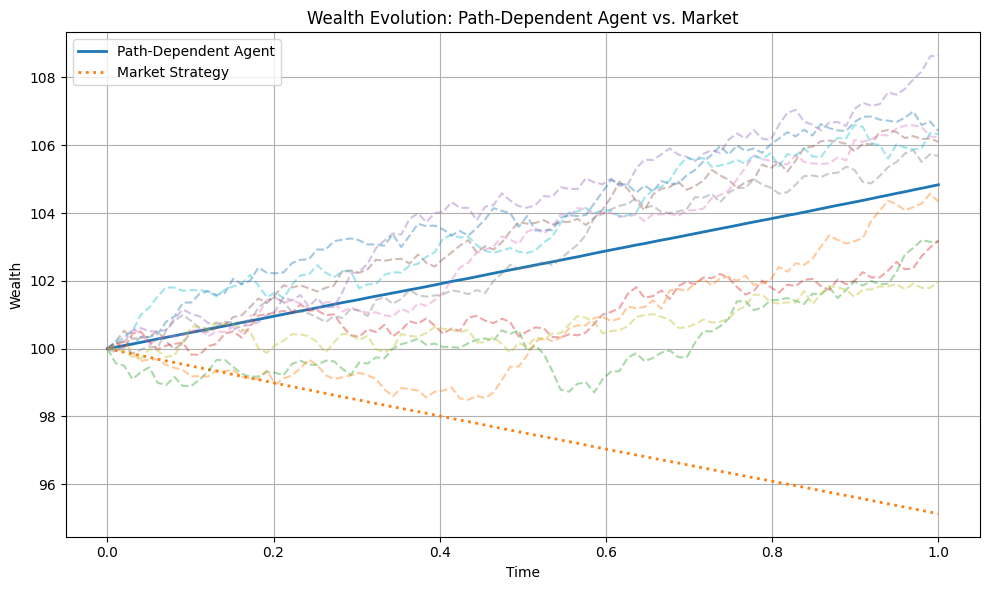

Agent - Mean Final Wealth: 104.8356
Agent - Final Wealth Std Dev: 1.9967
Market - Mean Final Wealth: 95.1302
Market - Final Wealth Std Dev: 1.9160


In [20]:
model_config = {
    'name': 'CEV',
    'params': {
        'mu': -0.05,
        'sigma': 0.2,
        'gamma': 0.5,
        'S0': 100
    }
}
evaluate_PDA(model_config)

100%|██████████| 99/99 [01:11<00:00,  1.39it/s]


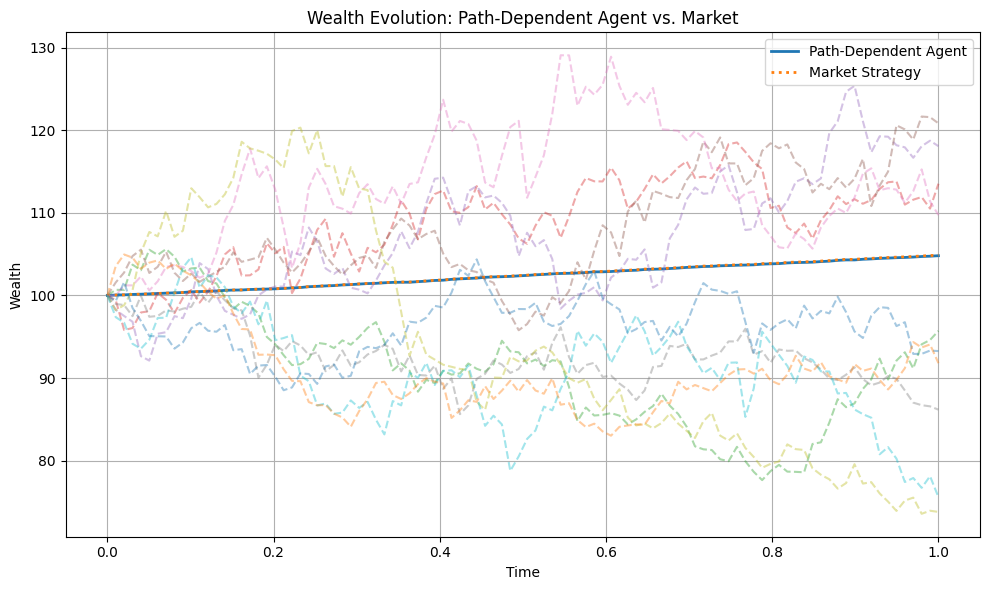

Agent - Mean Final Wealth: 104.8121
Agent - Final Wealth Std Dev: 21.4645
Market - Mean Final Wealth: 104.8851
Market - Final Wealth Std Dev: 21.8153


In [21]:
model_config = {
    'name': 'HESTON',
    'params': {
        'mu': 0.05,
        'kappa': 2.0,
        'theta': 0.04,
        'xi': 0.2,
        'rho': 0.4,
        'v0': 0.04,
        'S0': 100
    }
}
evaluate_PDA(model_config)

100%|██████████| 99/99 [01:09<00:00,  1.42it/s]


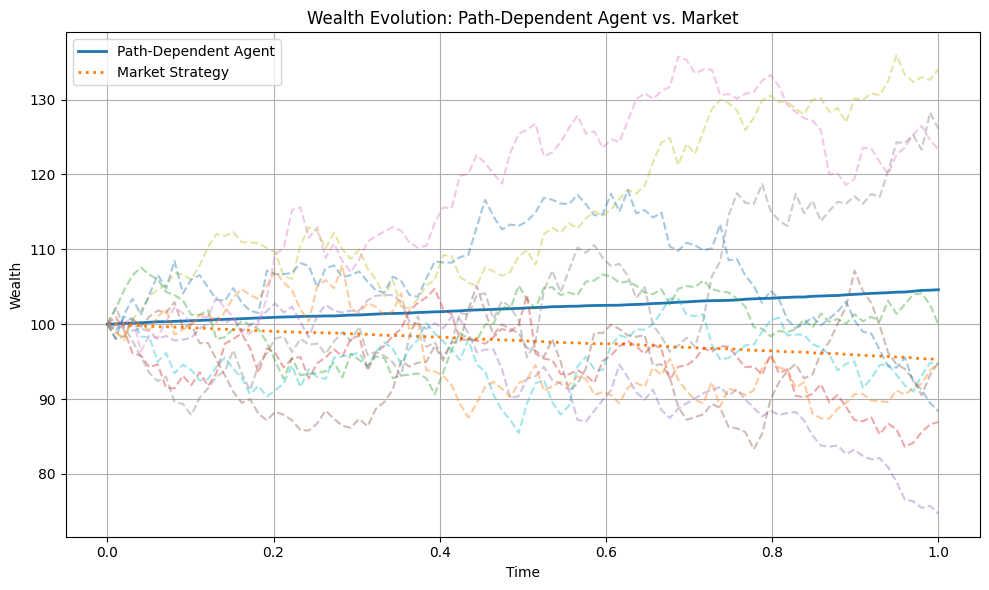

Agent - Mean Final Wealth: 104.5990
Agent - Final Wealth Std Dev: 19.1768
Market - Mean Final Wealth: 95.3071
Market - Final Wealth Std Dev: 19.9445


In [22]:
model_config = {
    'name': 'HESTON',
    'params': {
        'mu': -0.05,
        'kappa': 2.0,
        'theta': 0.04,
        'xi': 0.2,
        'rho': 0.4,
        'v0': 0.04,
        'S0': 100
    }
}
evaluate_PDA(model_config)

The plots indicate that neither of our agents is able to systematically exploit arbitrage opportunities, which is consistent with the design of the models, as both are constructed to be arbitrage-free. Intuitively, within the constraints of an arbitrage-free framework, the optimal strategy is to correctly infer the sign of the drift term $\mu$ and adjust positioning accordingly by taking long, short, or neutral (bond) positions. Among the two agents, both demonstrate the capacity to effectively do so. While it requires the Markovian Agent more epochs to find the optimal strategy, it still manages to find it. This is expected, as in these models, the price contains enough statistical information about the drift through the reward feedback over many paths, even though it does not directly reveal the drift at each point in time. Consequently, with sufficient training, even a memoryless agent can learn to align its positions with the underlying trend.
